# Pendahuluan

Data adalah sumber informasi yang bentuknya masih mentah dan menggambarkan suatu kejadian kejadian dan kesatuan nyata. Data dapat diperoleh dalam bentuk simbol-simbol karakter huruf, angka, gambar, suara, dan lain sebagainya. Agar data digunakan maka data harus diolah terlebih dahulu.

Data mining adalah proses pengumpulan dan pengolahan informasi data yang memiliki tujuan untuk mencari informasi penting pada data. Proses pengumpulan dan pencarian informasi tersebut dapat dilakukan dengan menggunakan perangkat lunak dengan bantuana perhitungan statistika, matematika atau teknologi _Machine Learning_ (ML) maupun _Artificial Intelligence_ (AI).

Proses Data Mining memiliki tujuan untuk sebagai sarana eksplorasi, konfirmasi dan eksplanasi. Terdapat beberapa metode untuk melakukan proses data mining, yaitu _Association_ yang berbasis hubungan variabel dalam dataset, _Classification_ yang digunakan untuk memprediksi suatu kelas, _Regression_ yang menjelaskan variabel dependen melalui proses analisis variabel independen, dan _Clustering_ yang digunakan untuk membagi kumpulan data menjadi beberapa kelompok atau disebut _cluster_ berdasarkan kemiripan atribut yang dimiliki.

Proses tersebut dapat diterapkan di berbagai dataset, termasuk dataset yang kami pilih. Dataset yang kami pilih adalah dataset `Airline Passenger Satisfaction` yang berisi kumpulan data penilaian pelanggan terhadap layanan yang diberikan oleh maskapai. Metode yang kami gunakan untuk dataset ini adalah metode klasifikasi. Dengan penggunaan metode klasifikasi, kami ingin membuat sebuah model yang dapat digunakan untuk memprediksi status kepuasan pelanggan berdasarkan beberapa kolom penilaian yang diberikan, hasil prediksi tersebut dibagi menjadi dua label yaitu label neutral or dissatisfied yang artinya pelanggan tersebut netral atau tidak puas dengan pelayanan yang diberikan dan label satisfied yang artinya pelanggan tersebut puas dengan pelayanan yang diberikan.

Kami juga ingin melihat sebuah perbandingan dari tiga algoritma metode klasifikasi yang kami pilih yaitu Naive Bayes, K-Nearest Neighbor, dan Decision Tree. Naive Bayes merupakan algoritma klasifikasi yang berdasarkan probabilitas, K-Nearest Neighbor adalah algoritma yang berdasarkana dengan jarak antar data, dan Decision Tree yang membuat prediksi menggunakan struktur pohon. Dalam membandingkan ketiga algoritma tersebut, kami menggunakan acuan nilai confusion matrix untuk menghitung _Accuracy_, _Precision_, dan _Recall_ setiap algoitma untuk dibandingkan.


# Pembahasan

## Preprocessing Data

### Gathering 

Dataset yang kami peroleh berasal dari situs [kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction). Dataset ini terdiri dari dua file yaitu `train.csv` yang terdiri dari 103904 baris dan `test.csv` terdiri dari 25976 baris. Kedua dataset ini memiliki 24 kolom dengan rincian sebagai berikut:

- id                                     
- Gender                                
- Customer Type                         
- Age                                    
- Type of Travel                        
- Class                                 
- Flight Distance                        
- Inflight wifi service                  
- Departure/Arrival time convenient      
- Ease of Online booking                 
- Gate location                          
- Food and drink                         
- Online boarding                        
- Seat comfort                           
- Inflight entertainment               
- On-board service                     
- Leg room service                     
- Baggage handling                     
- Checkin service                  
- Inflight service                     
- Cleanliness                          
- Departure Delay in Minutes           
- Arrival Delay in Minutes             
- satisfaction

Bentuk dataset yang kami ambil termasuk data terstruktur yang memiliki kolom dan baris. Jenis pemodelan data kami yaitu supervised sehingga kami menggunakan metode klasifikasi dalam analisis data.


### Assesing Data

In [1]:
# Support Libraries
import pandas as pd
import math
from six import StringIO
import pydotplus
import os
import shutil

# Classification and Clustering Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('./Dataset/Airline-Passenger-Satisfaction/train.csv', index_col=0)
df_test = pd.read_csv('./Dataset/Airline-Passenger-Satisfaction/test.csv', index_col=0)


Menampilkan metadata dari dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int64  


Menampilkan 5 record data teratas

In [4]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


Menggunakan method `describe()` untuk melihat distribusi statistik

In [6]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df_test.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


### Data Cleaning

Membersihkan missing value dan menghapus kolom indeks pada data, kemudian disimpan ke file `.csv`

Melihat total jumlah missing value di setiap kolom menggunakan method `isnull()` dan `sum()`

In [8]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
df_test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

Membersihkan missing value menggunakan method `dropna` untuk menghapus record yang memiliki `NaN`

In [10]:
df.dropna(inplace=True)

In [11]:
df_test.dropna(inplace=True)

Melakukan pengecekan kembali jumlah missing value

In [12]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [13]:
df_test.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Data Yang Sudah Dibersihkan

In [14]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [15]:
df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [112]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [113]:
df_test.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000
mean,65021.974858,39.621983,1193.753254,2.723709,3.046422,2.755996,2.976442,3.214923,3.261615,3.448886,3.356969,3.385587,3.349786,3.632681,3.313907,3.648824,3.285521,14.225080,14.740857
std,37606.098635,15.134224,998.626779,1.334711,1.532971,1.412552,1.281661,1.331895,1.355505,1.320254,1.338643,1.282033,1.319045,1.176220,1.269138,1.180650,1.319355,37.185919,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32209.000000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,65344.000000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97623.000000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000


Menggabungkan dataframe menggunakan method `concat()` dan parameter `ignore_index` untuk mengabaikan indeks pada dataframe.

In [16]:
df_merge = pd.concat([df, df_test], ignore_index=True)
df_merge.shape

(129487, 24)

Menyimpan dataframe yang sudah digabung ke dalam file `.csv`

In [17]:
output_file_path = './Dataset/Airline-Passenger-Satisfaction/merge_cleaned_data.csv'
df_merge.to_csv(output_file_path, index=False)

## EDA (Exploratory Data Analysis)

### Pertanyaan Analisis

1. Layanan apa yang memberikan kepuasan penumpang tertinggi?
2. Berapa rata-rata penilaian pelanggan untuk semua layanan?
3. Bagaimana perbandingan tingkat kepuasan penumpang antar kelas?
4. Bagaimana perbandingan hasil antara algoritma klasifikasi Naive Bayes, k-NN, dan Decision Tree?

### Tujuan

1. Mengidentifikasi layanan spesifik yang paling berkontribusi terhadap kepuasan penumpang dengan menganalisis korelasi antara berbagai aspek layanan dan tingkat kepuasan.
2. Menghitung nilai rata-rata dari seluruh layanan yang tersedia dalam dataset untuk memperoleh gambaran umum tentang kepuasan penumpang.
3. Melakukan perbandingan secara langsung antara kepuasan penumpang dari kelas ekonomi, ekonomi plus dan business untuk mengetahui apakah terdapat perbedaan signifikan dalam pengalaman penumpang di kategori kelas tersebut.
4. Menggunakan 3 teknik klasifikasi untuk membedakan penumpang berdasarkan tipe penumpang dan tingkat kepuasan yang mereka berikan terhadap layanan, serta membandingkan performa dari algoritma tersebut.

### Eksplorasi Data

Menemukan pola hubungan antar kolom dan mengubah kolom kategorikal menjadi numerik untuk digunakan pada proses selanjutnya.

Melihat data yang sudah dibersihkan

In [116]:
df_merge

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129483,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129484,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129485,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


Menampilkan beberapa baris pertama dari dataset

In [117]:
df_merge.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Statistik deskriptif untuk data numerik

In [118]:
df_merge.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,37489.781165,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32494.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64972.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97415.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


1. Layanan yang memberikan kepuasan paling tinggi

In [119]:
df_service = df_merge.iloc[:, 7:21]
df_service.mean().round(2)

Inflight wifi service                2.73
Departure/Arrival time convenient    3.06
Ease of Online booking               2.76
Gate location                        2.98
Food and drink                       3.20
Online boarding                      3.25
Seat comfort                         3.44
Inflight entertainment               3.36
On-board service                     3.38
Leg room service                     3.35
Baggage handling                     3.63
Checkin service                      3.31
Inflight service                     3.64
Cleanliness                          3.29
dtype: float64

In [120]:
# print service and the highest mean
print('Service with the highest mean:')
print(df_service.mean().round(2).idxmax())
print('Mean: ', df_service.mean().round(2).max())

# print service and the lowest mean
print('\nService with the lowest mean:')
print(df_service.mean().round(2).idxmin())
print('Mean: ', df_service.mean().round(2).min())

Service with the highest mean:
Inflight service
Mean:  3.64

Service with the lowest mean:
Inflight wifi service
Mean:  2.73


Dari hasil perhitungan didapatkan pelayanan dengan rata-rata paling tinggi yaitu `Inflight Service` dengan nilai 3.64 dan pelayanan dengan rata-rata paling rendah yaitu `Inflight wifi service` dengan nilai `2.73`.

2. Rata-rata penilaian seluruh pelanggan untuk semua layanan

In [121]:
df_AllAverage = df_merge.iloc[:, 7:21]
df_AllAverage['Average'] = df_AllAverage.mean(axis=1)
df_AllAverage


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Average
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,3.857143
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,2.285714
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,3.714286
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,3.000000
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,3,3,3,1,4,3,4,4,3,2,4,4,5,4,3.357143
129483,4,4,4,4,4,4,4,4,4,5,5,5,5,4,4.285714
129484,2,5,1,5,2,1,2,2,4,3,4,5,4,2,3.000000
129485,3,3,3,3,4,4,4,4,3,2,5,4,5,4,3.642857


In [122]:
print("Rata-rata keseluruhan:", df_AllAverage['Average'].mean())

Rata-rata keseluruhan: 3.2412608436147474


Nilai rata-rata yang didapatkan untuk keseluruhan layanan sebesar `3.24`. Dapat disimpulkan setiap pelanggan merasa cukup puas dengan pelayaan yang diberikan oleh maskapai penerbangan.

3. Perbandingan tingkat kepuasan penumpang antar kelas

In [123]:
df_avg_class_satisfaction =df_merge.iloc[:,[5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]].groupby('Class').mean()
df_avg_class_satisfaction

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Class,,,,,,,,,,,,,,
Business,2.775657,2.907582,2.915373,2.984981,3.329795,3.719035,3.763704,3.639313,3.682529,3.646169,3.844539,3.520745,3.846007,3.481933
Eco,2.673882,3.192560,2.602801,2.969699,3.086429,2.814478,3.142041,3.096426,3.120171,3.083848,3.450264,3.124507,3.467144,3.104617
Eco Plus,2.755864,3.209382,2.662793,2.968230,3.110554,2.886247,3.168763,3.120469,3.034755,3.056610,3.351812,3.014606,3.382303,3.118017


In [124]:
df_avg_class_satisfaction.mean(axis=1)

Class
Business    3.432669
Eco         3.066348
Eco Plus    3.060029
dtype: float64

Dari data di atas, kita dapat melihat rata-rata penilaian kelas business lebih besar dibandingkan dengan kedua kelas lainnya, yaitu dengan nilai rata-rata `3.432669`. Hal ini menandakan bahwa pelanggan yang memilih kelas business merasa puas dengan pelayanan yang diberikan. Sedangkan kelas ekonomi dan ekonomi plus mendapatkan rata-rata yang hampir sama, yaitu `3.066348` dan `3.060029`. Hal ini berarti pelanggan kelas tersebut merasa cukup puas dengan pelayanan yang diberikan.

Mengubah kolom kategorikal menjadi numerik menggunakan LabelEncoder dari Scikit-learn

In [19]:
label_encoder = LabelEncoder()
df_merge_encoded = df_merge.copy()
categorical_columns = df_merge_encoded.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    df_merge_encoded[col] = label_encoder.fit_transform(df_merge_encoded[col])

Menampilkan hasil transformasi kolom kategorikal menjadi numerik

In [126]:
df_merge_encoded.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


Mencari korelasi antar kolom numerik

In [127]:
correlation_matrix = df_merge_encoded.corr()
print("Matriks Korelasi:")
correlation_matrix

Matriks Korelasi:


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.000000,-0.001027,0.001359,0.020443,-0.000734,-0.104469,0.095027,-0.023242,-0.002056,0.013247,...,0.001944,0.055454,0.043914,0.074618,0.079154,0.078838,0.024425,-0.017506,-0.035657,0.012990
Gender,-0.001027,1.000000,-0.030803,0.008984,0.009215,-0.011655,0.003836,0.005968,0.008772,0.006129,...,0.003798,0.006441,0.031031,0.036414,0.008392,0.038176,0.002818,0.003111,0.001309,0.011496
Customer Type,0.001359,-0.030803,1.000000,-0.284275,-0.308210,0.042959,-0.226134,-0.005884,-0.206916,-0.018183,...,-0.106157,-0.054040,-0.046885,0.025015,-0.031258,0.023567,-0.081433,0.004131,0.004730,-0.185925
Age,0.020443,0.008984,-0.284275,1.000000,-0.044910,-0.116967,0.099863,0.015779,0.036780,0.022294,...,0.074990,0.056743,0.038992,-0.048192,0.033182,-0.051778,0.052575,-0.009263,-0.011248,0.134001
Type of Travel,-0.000734,0.009215,-0.308210,-0.044910,1.000000,0.486598,-0.267064,-0.105574,0.257208,-0.133891,...,-0.152708,-0.059700,-0.139540,-0.032921,0.016530,-0.023417,-0.084257,-0.006336,-0.005830,-0.449794
Class,-0.104469,-0.011655,0.042959,-0.116967,0.486598,1.000000,-0.427144,-0.024912,0.087185,-0.094989,...,-0.183178,-0.210748,-0.198828,-0.166507,-0.157380,-0.159110,-0.129715,0.009553,0.014162,-0.448338
Flight Distance,0.095027,0.003836,-0.226134,0.099863,-0.267064,-0.427144,1.000000,0.006554,-0.018901,0.064959,...,0.130518,0.111224,0.134548,0.064810,0.073635,0.059182,0.095658,0.001992,-0.001935,0.298206
Inflight wifi service,-0.023242,0.005968,-0.005884,0.015779,-0.105574,-0.024912,0.006554,1.000000,0.344846,0.714888,...,0.207887,0.120028,0.160414,0.120548,0.043847,0.110300,0.131163,-0.016046,-0.017749,0.283291
Departure/Arrival time convenient,-0.002056,0.008772,-0.206916,0.036780,0.257208,0.087185,-0.018901,0.344846,1.000000,0.437697,...,-0.008189,0.067046,0.010634,0.070646,0.091217,0.072166,0.010021,0.000610,-0.000942,-0.054457
Ease of Online booking,0.013247,0.006129,-0.018183,0.022294,-0.133891,-0.094989,0.064959,0.714888,0.437697,1.000000,...,0.046669,0.039039,0.109341,0.039215,0.008835,0.035356,0.015150,-0.005330,-0.007033,0.168704


Menyimpan data yang telah diubah

In [128]:
output_file_path = './Dataset/Airline-Passenger-Satisfaction/hasil_eksplorasi_data.csv'
df_merge_encoded.to_csv(output_file_path, index=False)

Melihat data yang telah diubah

In [129]:
df_merge_encoded

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,78463,1,1,34,0,0,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,0
129483,71167,1,0,23,0,0,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129484,37675,0,0,17,1,1,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,0
129485,90086,1,0,14,0,0,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [130]:
df_merge_encoded['satisfaction'].value_counts()

satisfaction
0    73225
1    56262
Name: count, dtype: int64

In [131]:
df_satisfaction = df_merge['satisfaction'].value_counts().reset_index()

plot = px.pie(df_satisfaction, values='count', names=df_satisfaction['satisfaction'].unique(), title='Satisfaction', height=400, width=500)
plot.show()

![satisfaction_pie.png](./Assets/satisfaction_pie.png)

Berdasarkan hasil data tersebut, label kepuasan pelanggan terhadap layanan penerbangan, terbagi menjadi 2 kategori. Kategori ```satisfied``` memiliki persentase lebih sedikit dari kategori ```neutral or dissatisfied```, tetapi persentase 56.6% tersebut terbagi menjadi dua kategori netral dan tidak puas yang hitungannya lebih kecil dari persentase puas secara penuh sehingga pelanggan cukup puas dan menikmati layanan penerbangan yang disediakan.

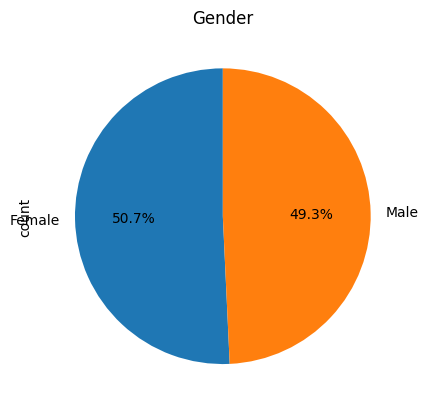

In [132]:
df_merge['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender')
plt.show()

Kumpulan data tersebut menunjukkan distribusi kepuasan penumpang yang secara umum seimbang antar gender, dengan jumlah penumpang perempuan sedikit lebih banyak dibandingkan laki-laki. Kepuasan penumpang cukup merata antar gender, dengan proporsi individu yang puas sedikit lebih tinggi baik pada kelompok pria maupun wanita. Temuan ini menyoroti keterwakilan penumpang laki-laki dan perempuan yang relatif setara, dengan jumlah penumpang perempuan yang sedikit lebih tinggi.

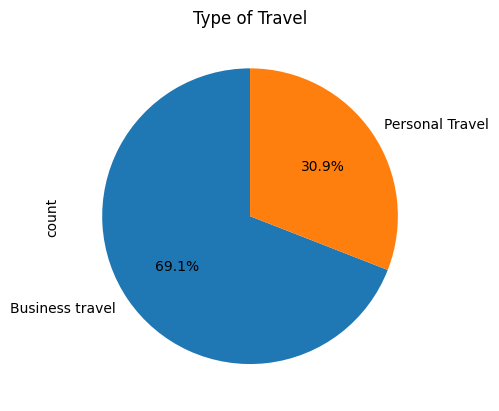

In [133]:
df_merge['Type of Travel'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Type of Travel')
plt.show()

In [134]:
df_travel = df_merge.groupby(['Type of Travel', 'satisfaction']).agg({'satisfaction': 'count'}).rename(columns={'satisfaction': 'Jumlah'})
df_travel.reset_index(inplace=True)
df_travel

,Type of Travel,satisfaction,Jumlah
0,Business travel,neutral or dissatisfied,37238
1,Business travel,satisfied,52207
2,Personal Travel,neutral or dissatisfied,35987
3,Personal Travel,satisfied,4055


In [135]:
plot = px.bar(df_travel, x='Type of Travel', y='Jumlah', color='satisfaction', barmode='group', title='Type of Travel vs Satisfaction', height=400, width=700, text='Jumlah')
plot.show()

![Type_of_travel_satisfaction.png](./Assets/Type_of_travel_satisfaction.png)

Jika dilihat dari tipe perjalanan yang dipilih oleh penumpang, persentase banyaknya penumpang yang paling besar yaitu tipe perjalanan bisnis. Jika dikaitkan dengan tingkat kepuasan, dapat diperoleh penumpang dengan perjalanan bisnis lebih dominan menyatakan label satisfication dan penumpang dengan perjalanan personal dominan menyatakan kepuasan label neutral or dissatisfaction. Dapat disimpulkan bahwa tipe perjalanan business dengan fasilitas yang lebih dapat mempengaruhi kepuasan pelanggan.

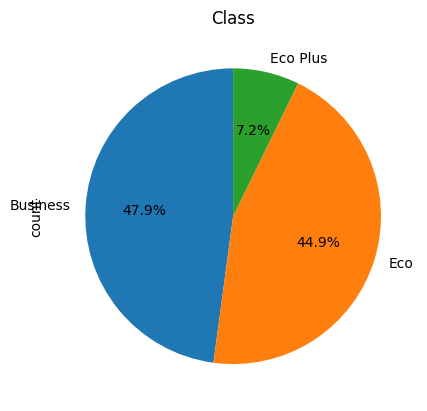

In [136]:
df_merge['Class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Class')
plt.show()

In [137]:
df_class = df_merge.groupby(['Class', 'satisfaction']).agg({'satisfaction': 'count'}).rename(columns={'satisfaction': 'Jumlah'})
df_class.reset_index(inplace=True)
df_class

,Class,satisfaction,Jumlah
0,Business,neutral or dissatisfied,18940
1,Business,satisfied,43050
2,Eco,neutral or dissatisfied,47215
3,Eco,satisfied,10902
4,Eco Plus,neutral or dissatisfied,7070
5,Eco Plus,satisfied,2310


In [138]:
plot = px.bar(df_class, x='Class', y='Jumlah', color='satisfaction', barmode='group', title='Class vs Satisfaction', height=400, width=700, text='Jumlah')
plot.show()

![class_satisfaction.png](./Assets/class_satisfaction.png)

Berdasarkan data di atas, dihasilkan bahwa jumlah penumpang pada class kategori business menggambarkan jumlah terbesar dengan label kepuasan satisfied, sedangkan jumlah penumpang pada urutan kedua masuk ke dalam class kategori eco dengan dominan label kepuasan neutral or dissatisfied, dan pada class kategori eco plus memiliki jumlah penumpang terkecil dengan tingkat kepuasan neutral or dissatisfied lebih besar. Dapat disimpulkan class penerbangan dapat mempengaruhi tingkat kepuasan.

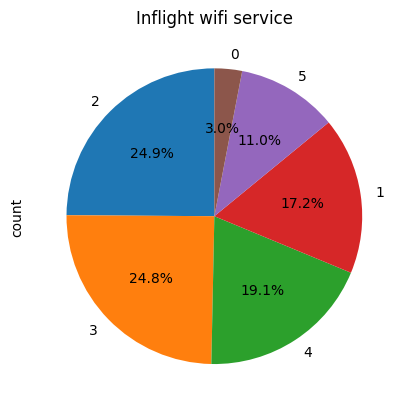

In [139]:
df_merge_encoded['Inflight wifi service'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Inflight wifi service')
plt.show()

In [140]:
df_inflight = df_merge.groupby(['Class', 'Inflight wifi service', 'satisfaction']).agg({'satisfaction': 'count'}).rename(columns={'satisfaction': 'Jumlah'})
df_inflight.reset_index(inplace=True)
df_inflight

,Class,Inflight wifi service,satisfaction,Jumlah
0,Business,0,satisfied,2487
1,Business,1,neutral or dissatisfied,3964
2,Business,1,satisfied,7299
3,Business,2,neutral or dissatisfied,6230
4,Business,2,satisfied,7569
5,Business,3,neutral or dissatisfied,6014
6,Business,3,satisfied,7565
7,Business,4,neutral or dissatisfied,2637
8,Business,4,satisfied,9208
9,Business,5,neutral or dissatisfied,95


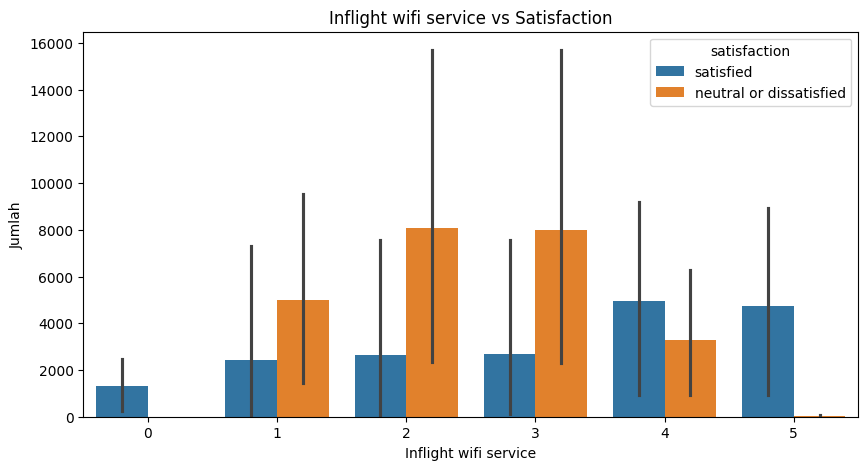

In [141]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Inflight wifi service', y='Jumlah', hue='satisfaction', data=df_inflight)
plt.title('Inflight wifi service vs Satisfaction')
plt.show()

Berdasarkan data di atas, layanan inflight wifi mendapat penilaian kepuasan pelanggan dengan skala 2 dari 5 paling banyak dari keseluruhan data penumpang sebesar 24.9%. Secara rincian penyumbang penilaian `satisfied` didominasi oleh pelanggan class business menunjukkan bahwa class penumpang mempengaruhi kualitas penyediaan layanan.

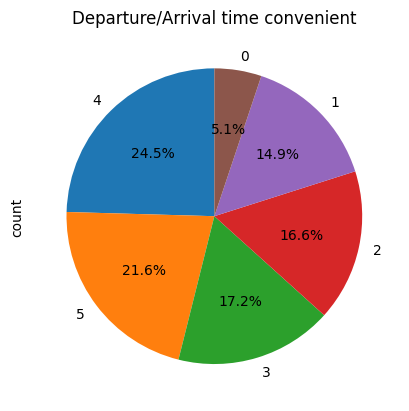

In [142]:
df_merge_encoded['Departure/Arrival time convenient'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Departure/Arrival time convenient')
plt.show()

Berdasarkan data di atas, layanan departure/arrival time convenient mendapat penilaian kepuasan pelanggan dengan skala 4 dari 5 paling banyak dari keseluruhan data penumpang sebesar 24.5%. Dapat disimpulkan bahwa layanan ini cukup memberikan pelayanan yang baik.

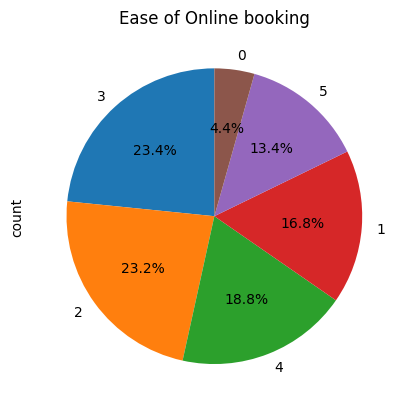

In [143]:
df_merge_encoded['Ease of Online booking'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Ease of Online booking')
plt.show()

Berdasarkan data di atas, layanan ease of online booking mendapat penilaian kepuasan pelanggan dengan skala 3 dari 5 paling banyak dari keseluruhan data penumpang sebesar 23.4%. Dapat disimpulkan bahwa layanan ini cukup memberikan pelayanan yang baik dengan memberikan kemudahan dalam pemesanan tiket via online.

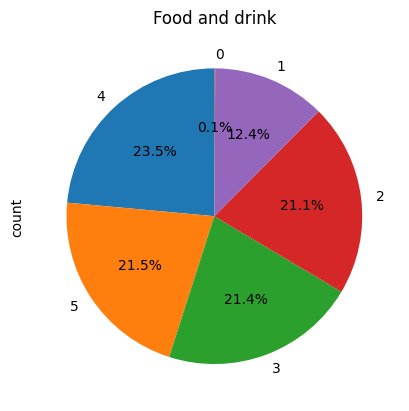

In [144]:
df_merge_encoded['Food and drink'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Food and drink')
plt.show()

In [145]:
df_food = df_merge.groupby(['Class', 'Food and drink', 'satisfaction']).agg({'satisfaction': 'count'}).rename(columns={'satisfaction': 'Jumlah'})
df_food.reset_index(inplace=True)
df_food

,Class,Food and drink,satisfaction,Jumlah
0,Business,0,neutral or dissatisfied,13
1,Business,0,satisfied,24
2,Business,1,neutral or dissatisfied,3521
3,Business,1,satisfied,1839
4,Business,2,neutral or dissatisfied,4450
5,Business,2,satisfied,8736
6,Business,3,neutral or dissatisfied,4437
7,Business,3,satisfied,8970
8,Business,4,neutral or dissatisfied,3531
9,Business,4,satisfied,12008


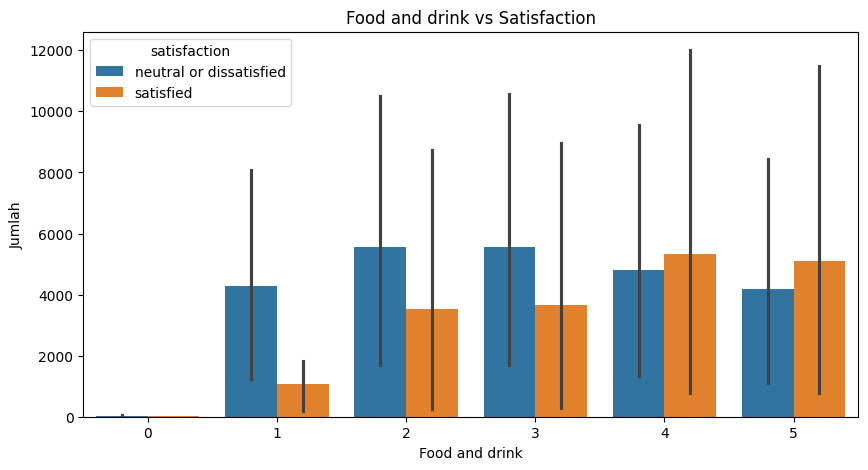

In [146]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Food and drink', y='Jumlah', hue='satisfaction', data=df_food)
plt.title('Food and drink vs Satisfaction')
plt.show()

Berdasarkan data di atas, layanan food and drink mendapat penilaian kepuasan pelanggan dengan skala 4 dari 5 paling banyak dari keseluruhan data penumpang sebesar 23.5%. Dari rincian data di atas, berdasarkan kategori class dapat mempengaruhi kepuasan terhadap makanan dan minuman yang sediakan.

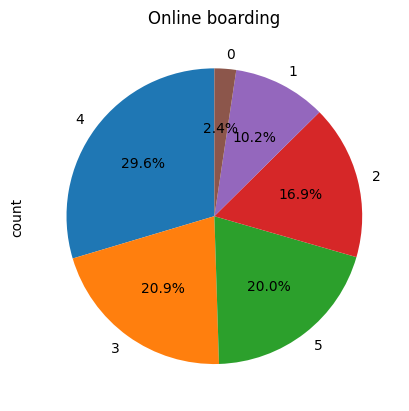

In [147]:
df_merge_encoded['Online boarding'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Online boarding')
plt.show()

Berdasarkan data di atas, layanan online boarding mendapat penilaian kepuasan pelanggan dengan skala 4 dari 5 paling banyak dari keseluruhan data penumpang sebesar 29.6%. Dapat disimpulkan bahwa layanan ini cukup memberikan pelayanan yang baik. 

In [148]:
df_seat_comfot = df_merge_encoded['Seat comfort'].value_counts().reset_index().rename(columns={'count':'Jumlah'})
plot = px.pie(df_seat_comfot, values='Jumlah', names=df_seat_comfot['Seat comfort'], title='Seat comfort', height=400, width=500)
plot.show()

![seat_comfort_pie.png](./Assets/seat_comfort_pie.png)

In [149]:
df_seat = df_merge.groupby(['Seat comfort', 'Class']).size().reset_index(name='Jumlah')

fig_bar_seat = px.bar(df_seat, x='Seat comfort', y='Jumlah', color='Class', title='Seat comfort vs Class', 
                      labels={'Seat comfort': 'Seat Comfort', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_seat.update_layout(width=800, height=500)
fig_bar_seat.show()

![seat_comfort_service.png](./Assets/seat_comfort_service.png)

Berdasarkan data di atas, layanan seat comfort mendapat penilaian kepuasan pelanggan dengan skala 4 dari 5 paling banyak dari keseluruhan data penumpang sebesar 30.6%. Dengan detail, pada rating 4 dan 5 ditempati oleh class business dan pada rating 4 cukup banyak dibandingkan seluruh rate di semua class. Dapat disimpulkan tempat duduk di semua class cukup nyaman.

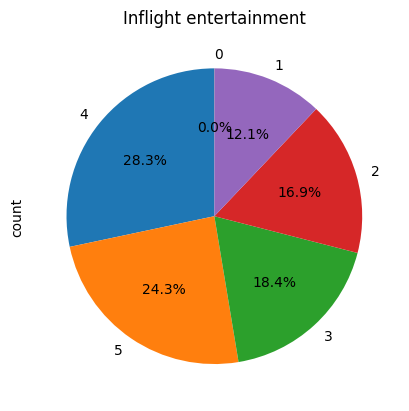

In [150]:
df_inflight_entertainment = df_merge_encoded['Inflight entertainment'].value_counts().reset_index().rename(columns={'count':'Jumlah'})
plot = px.pie(df_inflight_entertainment, values='Jumlah', names=df_inflight_entertainment['Inflight entertainment'], title='Inflight entertainment', height=400, width=500)
plot.show()

![inflight_entertainment_pie.png](./Assets/inflight_entertainment_pie.png)

In [151]:
df_inflight = df_merge.groupby(['Inflight entertainment', 'Class']).size().reset_index(name='Jumlah')

fig_bar_inflight = px.bar(df_inflight, x='Inflight entertainment', y='Jumlah', color='Class', title='Inflight entertainment vs Class', 
                      labels={'Inflight entertainment': 'Inflight entertainment', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_inflight.update_layout(width=800, height=500)
fig_bar_inflight.show()

![inflight_service_class.png](./Assets/inflight_entertainment_class.png)

Berdasarkan data di atas, layanan inflight entertainment mendapat penilaian kepuasan pelanggan dengan skala 4 dari 5 paling banyak dari keseluruhan data penumpang sebesar 28.3%. Dari visualisasi jumlah rating untuk masing-masing class yang tertinggi terdapat di rating 4 yang dapat dikategorikan cukup baik untuk pelayanan ini untuk semua class.

In [152]:
df_onboard = df_merge_encoded['On-board service'].value_counts().reset_index().rename(columns={'count': 'Jumlah'})
plot = px.pie(df_onboard, values='Jumlah', names=df_onboard['On-board service'], title='On-board service', height=400, width=500)
plot.show()

![on_board_pie.png](./Assets/on_board_pie.png)

In [153]:
df_board = df_merge.groupby(['On-board service', 'Class']).size().reset_index(name='Jumlah')

fig_bar_board = px.bar(df_board, x='On-board service', y='Jumlah', color='Class', title='On-board service vs Class', 
                      labels={'On-board service': 'On-board service', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_board.update_layout(width=800, height=500)
fig_bar_board.show()

![on_board_class.png](./Assets/on_board_class.png)

Berdasarkan data di atas, layanan on-board service terdapat tren signifikan di mana sebagian besar penumpang menilai layanan dalam kisaran 1 hingga 3 merupakan kelompok class ekonomi yang melaporkan tingkat kepuasan yang lebih rendah. Sedangkan, penumpang dengan rating 4 atau 5 menunjukkan tingkat kepuasan yang lebih tinggi berasal dari class business. Oleh karena itu, dapat disimpulkan untuk pelayanan di dalam pesawat harus ditingkatkan pada class ekonomi.

In [154]:
df_legroom = df_merge_encoded['Leg room service'].value_counts().reset_index().rename(columns={'count': 'Jumlah'})
plot = px.pie(df_legroom, values='Jumlah', names=df_legroom['Leg room service'], title='Leg room service', height=400, width=500)
plot.show()

![legroom_pie.png](./Assets/legroom_pie.png)

In [155]:
df_legroom = df_merge.groupby(['Leg room service', 'Class']).size().reset_index(name='Jumlah')

fig_bar_legroom = px.bar(df_legroom, x='Leg room service', y='Jumlah', color='Class', title='Leg room vs Class', 
                      labels={'Leg room': 'Leg room', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_legroom.update_layout(width=800, height=500)
fig_bar_legroom.show()

![legroom_class.png](./Assets/legroom_class.png)

Berdasarkan data di atas, layanan leg room terdapat tren signifikan di mana sebagian besar penumpang menilai layanan dalam kisaran 1 hingga 3 merupakan kelompok class ekonomi yang melaporkan tingkat kepuasan yang lebih tinggi. Sedangkan, penumpang dengan rating 4 atau 5 menunjukkan tingkat kepuasan yang lebih tinggi berasal dari class business. Dapat disimpulkan untuk pelayanan leg room pada class ekonomi masih kurang.

In [156]:
df_baggage_handling = df_merge_encoded['Baggage handling'].value_counts().reset_index().rename(columns={'count': 'Jumlah'})
plot = px.pie(df_baggage_handling, values='Jumlah', names=df_baggage_handling['Baggage handling'], title='Baggage handling', height=400, width=500)
plot.show()

![baggage_handling-pie.png](./Assets/baggage_handling-pie.png)

In [157]:
df_baggage = df_merge.groupby(['Baggage handling', 'Class']).size().reset_index(name='Jumlah')

fig_bar_baggage = px.bar(df_baggage, x='Baggage handling', y='Jumlah', color='Class', title='Baggage handling vs Class', 
                      labels={'Baggage handling': 'Baggage handling', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_baggage.update_layout(width=800, height=500)
fig_bar_baggage.show()

![baggage_handling-class.png](./Assets/baggage_handling-class.png)

Berdasarkan data di atas, layanan baggage handling terdapat tren signifikan di mana sebagian besar penumpang menilai layanan dalam kisaran 1 hingga 3 merupakan kelompok class ekonomi yang melaporkan tingkat kepuasan yang lebih tinggi. Sedangkan, penumpang dengan rating 4 atau 5 menunjukkan tingkat kepuasan yang lebih tinggi berasal dari class business. Dapat disimpulkan untuk pelayanan bagasi pada class business cukup baik dan class ekonomi masih kurang maka perlu ditingkatkan.

In [158]:
df_checkin = df_merge_encoded['Checkin service'].value_counts().reset_index().rename(columns={'count': 'Jumlah'})
plot = px.pie(df_checkin, values='Checkin service', names=df_checkin['Checkin service'], title='Checkin service', height=400, width=500)
plot.show()

![checkin_service_pie.png](./Assets/checkin_service_pie.png)

In [159]:
df_checkin = df_merge.groupby(['Checkin service', 'Class']).size().reset_index(name='Jumlah')

fig_bar_checkin = px.bar(df_checkin, x='Checkin service', y='Jumlah', color='Class', title='Checkin service vs Class', 
                      labels={'Checkin service': 'Checkin service', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_checkin.update_layout(width=800, height=500)
fig_bar_checkin.show()

![checkin_service_class.png](./Assets/checkin_service_class.png)

Berdasarkan data di atas, layanan checkin service terdapat tren signifikan di mana sebagian besar penumpang menilai layanan dalam kisaran 1 dan 2 merupakan kelompok class ekonomi yang melaporkan tingkat kepuasan yang lebih tinggi. Sedangkan, penumpang dengan rating 3, 4, dan 5 menunjukkan tingkat kepuasan yang lebih tinggi berasal dari class business. Dapat disimpulkan untuk pelayanan checkin pada penumpang business lebih baik.

In [160]:
df_inflight_service = df_merge_encoded['Inflight service'].value_counts().reset_index().rename(columns={'count': 'Jumlah'})
plot = px.pie(df_inflight_service, values='Jumlah', names=df_inflight_service['Inflight service'], title='Inflight service', height=400, width=500)
plot.show()

![inflight_pie.png](./Assets/inflight_pie.png)

In [161]:
df_inflight_service = df_merge.groupby(['Inflight service', 'Class']).size().reset_index(name='Jumlah')

fig_bar_inflight_service = px.bar(df_inflight_service, x='Inflight service', y='Jumlah', color='Class', title='Inflight service vs Class', 
                      labels={'Inflight service': 'Inflight service', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_inflight_service.update_layout(width=800, height=500)
fig_bar_inflight_service.show()

![inflight_service_class.png](./Assets/inflight_service_class.png)

Berdasarkan data di atas, layanan inflight service terdapat tren signifikan di mana sebagian besar penumpang menilai layanan dalam kisaran 1 hingga 3 merupakan kelompok class ekonomi yang melaporkan tingkat kepuasan yang lebih tinggi. Sedangkan, penumpang dengan rating 4 atau 5 menunjukkan tingkat kepuasan yang lebih tinggi berasal dari class business. Dapat disimpulkan untuk pelayanan penerbangan harus ditingkatkan pada class ekonomi.

In [162]:
df_cleanliness = df_merge_encoded['Cleanliness'].value_counts().reset_index().rename(columns={'count': 'Jumlah'})
plot = px.pie(df_cleanliness, values='Jumlah', names=df_cleanliness['Cleanliness'], title='Cleanliness', height=400, width=600)
plot.show()

![image.png](./Assets/cleanliness_pie.png)

In [163]:
df_cleanliness = df_merge.groupby(['Cleanliness', 'Class']).size().reset_index(name='Jumlah')

fig_bar_cleanliness = px.bar(df_cleanliness, x='Cleanliness', y='Jumlah', color='Class', title='Cleanliness vs Class', 
                      labels={'Cleanliness': 'Cleanliness', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_cleanliness.update_layout(width=800, height=500)
fig_bar_cleanliness.show()

![cleanliness_class.png](./Assets/cleanliness_class.png)

Untuk pelayanan kebersihan, penilaian terbesar terdapat pada rating 4 dengan setiap classnya paling banyak menilai dengan rating 4, tetapi untuk rating 1 sampai 3 masih terbilang besar, sehingga diperlukan peningkatan kebersihan pada layanan maskapai guna meningkatkan kenyamanan penumpang. 

## Pengukuran Kinerja Algoritma

Untuk mengukur kinerja dari model klasifikasi terdapat beberapa metrik yang dapat dijadikan acuan. Dalam penelitian ini kami menggunakan metrik _Accuracy_, _Precision_, dan _Recall_.

- Accuracy adalah rasio prediksi yang benar (baik positif maupun negatif) dengan keseluruhan data. Rumusnya adalah:

    $$ Accuracy = \frac{ TP + TN } { TP + FP + FN + TN }$$

- Precision adalah rasio prediksi yang benar positif dengan keseluruhan hasil yang diprediksi positif. Rumusnya adalah:

    $$ Precision = \frac { TP } { TP + FP } $$

- Recall adalah rasio prediksi yang benar positif dengan keseluruhan data ynag sebenarnya positif. Rumusnya adalah:

    $$ Recall = \frac { TP } { TP + FN } $$


### Klasifikasi Naive Bayes

Algoritma Naive Bayes adalah algoritma klasifikasi yang berbasis probabilitas menggunakan teorema Bayes untuk menghitung kemungkinan suatu data masuk ke dalam kelas tertentu. Rumus teorema Bayes adalah sebagai berikut:

$$ P(C \mid X) = \frac {P(X \mid C) P(C)}{ P(X)} $$

Berikut adalah implementasi metode klasifikasi menggunakan algoritma `Naive Bayes` menggunakan Python. Jumlah data train sebesar 75% dan data test sebesar 25% dari total keseluruhan.

In [20]:
df_encode = df_merge_encoded.iloc[:, 1:23]
df_encode.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [165]:
X = df_encode
y = df_merge['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
nbModel = GaussianNB()
nbModel = nbModel.fit(X_train, y_train)
y_pred = nbModel.predict(X_test)
y_pred

array(['neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied',
       ..., 'neutral or dissatisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied'], dtype='<U23')

Menampilkan confusion matrix untuk merepresentasikan prediksi dengan kondisi sebenarnya (aktual) pada data yang dianalisis.

In [167]:
confusion_matrix(y_test, y_pred)

array([[16457,  1793],
       [ 2605, 11517]], dtype=int64)

In [168]:
y_pred = nbModel.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.86
                         precision    recall  f1-score   support

neutral or dissatisfied       0.86      0.90      0.88     18250
              satisfied       0.87      0.82      0.84     14122

               accuracy                           0.86     32372
              macro avg       0.86      0.86      0.86     32372
           weighted avg       0.86      0.86      0.86     32372



Klasifikasi menggunakan metode Naive Bayes menghasilkan nilai sebagai berikut:

- Accuracy dengan nilai `0.86` yang berarti model klasifikasi menggunakan algorimt Naive Bayes dapat mengklasifikasikan data dengan benar sebanyak `86%`. 
- Precision dengan nilai `0.87` yang berarti semua data yang diprediksi sebagai label `1` atau `satisfied` dengan benar sebesar `87%`. 
- Recall dengan nilai `0.82` yang berarti data yang sebenarnya diberi label `1` sebanyak `82%` dari keseluruhan data.

### Klasifikasi K-NN

Algoritma K-NN adalah algoritma klasifikasi dengan prinsip mencari jarak terdekat antara data yang dievaluasi dengan K tetangga (neighbor). Dalam penentuan jarak antar data terdapat beberapa rumus, misalnya `Euclidean`, `Hamming`, `Manhattan`, dan `Minkowski`. Pada penelitin ini kami menggunakan rumus `Euclidean`, dengan rumusnya sebagai berikut:

$$ d_i = \sqrt{ \sum_{i=1}^{p}(X_{2i} - X_{1i})^2} $$

di mana:

X1 = Sampel Data

X2 = Data Uji

i = variabel data 

d = jarak 

p = dimensi data 


Berikut adalah implementasi K-NN menggunakan Python. Jumlah data train sebesar 75% dan data test sebesar 25% dari total keseluruhan.

In [169]:
X = df_encode
y = df_merge['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [170]:
knn_models = KNeighborsClassifier(n_neighbors=int(math.sqrt(X_train.shape[0])), metric='euclidean')
knn_models.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=311)

In [171]:
y_pred = knn_models.predict(X_test_scaled)
y_pred

array(['satisfied', 'neutral or dissatisfied', 'satisfied', ...,
       'satisfied', 'neutral or dissatisfied', 'neutral or dissatisfied'],
      dtype=object)

Menampilkan confusion matrix untuk merepresentasikan prediksi dengan kondisi sebenarnya (aktual) pada data yang dianalisis.

In [172]:
confusion_matrix(y_test, y_pred)

array([[17671,   726],
       [ 2244, 11731]], dtype=int64)

In [173]:
accuracy = accuracy_score(y_test, y_pred).round(2)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print(report)

Accuracy: 0.91
                         precision    recall  f1-score   support

neutral or dissatisfied       0.89      0.96      0.92     18397
              satisfied       0.94      0.84      0.89     13975

               accuracy                           0.91     32372
              macro avg       0.91      0.90      0.91     32372
           weighted avg       0.91      0.91      0.91     32372



Klasifikasi menggunakan metode K-Nearest Neighbor (K-NN) menghasilkan peningkatan nilai di beberapa metrik dengan rincian sebagai berikut:

- Accuracy dengan nilai `0.91` yang berarti model klasifikasi menggunakan algorimta K-NN dapat mengklasifikasikan data dengan benar sebanyak `91%`. 
- Precision dengan nilai `0.94` yang berarti semua data yang diprediksi sebagai label `1` atau `satisfied` dengan benar sebesar `94%`. 
- Recall dengan nilai `0.84` yang berarti data yang sebenarnya diberi label `1` sebanyak `84%` dari keseluruhan data.

Dari hasil di atas menunjukkan algoritma K-NN lebih optimal daripada algoritma Naive Bayes

### Decision Tree

Decision Tree adalah metode pemodelan prediktif dalam analisis data yang menggunakan struktur pohon. Tujuannya untuk menggambarkan serta membuat keputusan berdasarkan serangkain aturan dan kondisi.

Gini adalah suatu index untuk membagi data menjadi kelas-kelas yang berbeda. Nilai Gini bervariasi antara 0 dan 1, di mana 0 berarti data murni (semua data termasuk dalam satu kelas) dan 1 berarti data tidak murni (data tersebar secara acak di berbagai kelas). Rumus untuk menghitung nilai Gini untuk suatu fitur adalah:

$$ Gini = 1 - \sum_{i=1}^{n}p^2_i $$

di mana n adalah jumlah kelas yang ada, dan  pi adalah proporsi data yang termasuk dalam kelas ke-1.

Berikut adalah implementasi Decisiton Tree menggunakan Python. Jumlah data train sebesar 75% dan data test sebesar 25% dari total keseluruhan.


In [174]:
treeModel = DecisionTreeClassifier(max_depth=10)
X = df_encode
y = df_merge['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


treeModel.fit(X_train, y_train)

y_pred = treeModel.predict(X_test)
y_pred

array(['neutral or dissatisfied', 'satisfied', 'satisfied', ...,
       'satisfied', 'neutral or dissatisfied', 'satisfied'], dtype=object)

Menampilkan confusion matrix untuk merepresentasikan prediksi dengan kondisi sebenarnya (aktual) pada data yang dianalisis.

In [175]:
confusion_matrix(y_test, y_pred)

array([[17760,   611],
       [ 1129, 12872]], dtype=int64)

In [176]:
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.95


                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.97      0.95     18371
              satisfied       0.95      0.92      0.94     14001

               accuracy                           0.95     32372
              macro avg       0.95      0.94      0.94     32372
           weighted avg       0.95      0.95      0.95     32372



Klasifikasi menggunakan metode Decision Tree menghasilkan peningkatan nilai di beberapa metrik dengan rincian sebagai berikut:

- Accuracy dengan nilai `0.95` yang berarti model klasifikasi menggunakan algoritma Decision Tree dapat mengklasifikasikan data dengan benar sebanyak `95%`. 
- Precision dengan nilai `0.95` yang berarti semua data yang diprediksi sebagai label `1` atau `satisfied` dengan benar sebesar `95%`. 
- Recall dengan nilai `0.92` yang berarti data yang sebenarnya diberi label `1` sebanyak `92%` dari keseluruhan data.

Dari hasil di atas menunjukkan algoritma Decision Tree lebih optimal daripada algoritma K-NN

In [177]:
tree_dot = StringIO()
export_graphviz(treeModel, out_file=tree_dot, feature_names=X.columns, class_names=df_merge['satisfaction'].unique().tolist(), rounded=True, filled=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(tree_dot.getvalue())

name_file = './Assets/DecisionTree.dot'

# check if directory exist
if not os.path.exists('./Assets'):
    os.makedirs('./Assets')

with open(name_file, 'w') as png:
    png.write(graph.to_string())


In [178]:
if shutil.which('dot') is None:
    print("Install Graphviz for Windows: https://graphviz.gitlab.io/_pages/Download/Download_windows.html")
else:
    os.system('dot -Tsvg ./Assets/DecisionTree.dot -o ./Assets/DecisionTree.svg && start \"\" ./Assets/DecisionTree.svg')


# Kesimpulan

Berdasarkan hasil analisis data di atas label kepuasan pelanggan dibagi menjadi 2 kategori yaitu: kategori `satisfied` dengan persentase `43.4%`, lebih kecil dari kategori `neutral or dissatisfied` yang memiliki persentase `56.6%`. Tingkat kepuasan ini ditentukan dari hasil penilaian kepuasan pelanggan terhadap layanan yang disediakan maskapai penerbangan. Dalam penilaian pelayanan dikaitkan dengan kategori kelas penumpang, berdasarkan data kelas `business` memiliki persentase kelas terbesar dari jumlah seluruh penumpang.

Dari hasil penilaian pelayanan yang telah dilakukan dapat disimpulkan dengan rincian layanan sebagai berikut:

- Inflight Wifi Service
- Departure/Arrival Time Convenient
- Ease of Online Booking
- Food and Drink
- Online Boarding
- Seat Comfort
- Inflight Entertainment
- Onboard Service
- Leg Room Service
- Baggage Handling
- Check-in Service
- Inflight Service
- Cleanliness

Hasil penilaian pelanggan menunjukkan sebagian besar layanan mendapatkan tingkat kepuasan di skala 4 dari 5 yang di dominasi oleh kelas `business`. Untuk tingkat kepuasan pelanggan skala 1 sampai 3 di semua layanan didominasi oleh kelas `ekonomi`. Dapat disimpulkan kelas penerbangan mempengaruhi penyediaan layanan, sehingga perlu adanya peningkatan layanan pada kelas `ekonomi` agar meningkatkan kepuasan pelanggan.

Untuk hasil perbandingan kinerja algoritma klasifikasi yang kami lakukan, didapatkan hasil yang tercantum di tabel berikut:

| Algoritma |Label| Accuracy | Precision | Recall |
|-----------|-----|:--------:|:---------:|:------:|
| Naive Bayes |satisfied| 0.86| 0.87| 0.82|
| K-NN |satisfied| 0.91 | 0.94| 0.84|
| Decision Tree |satisfied| 0.95 | 0.95 | 0.92 |

Berdasarkan analisis confusion matrix dari ketiga algoritma dihasilkan False Negative pada algoritma Naive dan K-NN memiliki nilai yang lebih besar dibandingkan False Positive sehingga meningkatkan peluang type error lebih besar dalam pengambilan keputusan. Sedangkan, menggunakan algoritma Decision Tree nilai False Negative lebih kecil dari False Positive sehingga prediksi lebih akurat untuk mendapatkan hasil prediksi kepuasan.

# Daftar Pustaka

Arthana, R. (2019, April 5). _Mengenal Accuracy, Precision, Recall dan Specificity serta yang diprioritaskan dalam Machine Learning_. Medium. Retrieved December 6, 2023, from https://rey1024.medium.com/mengenal-accuracy-precission-recall-dan-specificity-serta-yang-diprioritaskan-b79ff4d77de8

Dewi, A. C. (2021, February 6). _Klasifikasi Menggunakan Algoritma Decision Tree_. Medium. Retrieved December 6, 2023, from https://agneschintiadewi.medium.com/klasifikasi-menggunakan-algoritma-decision-tree-446d500ba73c

Nugroho, K. S. (2019, November 13). _Confusion Matrix untuk Evaluasi Model pada Supervised Learning_. Medium. Retrieved December 6, 2023, from https://ksnugroho.medium.com/confusion-matrix-untuk-evaluasi-model-pada-unsupervised-machine-learning-bc4b1ae9ae3f

Rizky, M. S. (2019, February 17). _How to: Mengubah Data Kategori Menjadi Numerik dengan Python_. Medium. Retrieved December 6, 2023, from https://medium.com/@msifaulkiki/how-to-mengubah-data-kategori-menjadi-numerik-dengan-python-73f7b6e1639f

Srivastava, T. (2023, October 20). _A Complete Guide to K-Nearest Neighbors (Updated 2023)_. Analytics Vidhya. Retrieved December 6, 2023, from https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

W., D. D. (2021, July 9). _Data Preparation_. Medium. Retrieved December 6, 2023, from https://medium.com/sysinfo/data-preparation-78ef3da24347
